<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Load" data-toc-modified-id="Data-Load-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Load</a></span></li><li><span><a href="#Input-x-Backpropagation" data-toc-modified-id="Input-x-Backpropagation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Input x Backpropagation</a></span></li><li><span><a href="#MNIST" data-toc-modified-id="MNIST-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>MNIST</a></span></li><li><span><a href="#CIFAR10" data-toc-modified-id="CIFAR10-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>CIFAR10</a></span></li><li><span><a href="#Save-saliency-maps" data-toc-modified-id="Save-saliency-maps-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Save saliency maps</a></span><ul class="toc-item"><li><span><a href="#MNIST" data-toc-modified-id="MNIST-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>MNIST</a></span></li><li><span><a href="#CIFAR10" data-toc-modified-id="CIFAR10-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>CIFAR10</a></span></li></ul></li></ul></div>

In [1]:
import torch

import numpy as np
import sys

import matplotlib.pyplot as plt

sys.path.append('../code')
from dataload import mnist_load, cifar10_load
from saliency.attribution_methods import InputBackprop
from saliency.ensembles import *
from utils import get_samples
from visualization import visualize_saliencys

# Data Load

In [2]:
original_images_mnist, original_targets_mnist, pre_images_mnist, mnist_classes, mnist_model = get_samples('mnist')

Data Complete
Model Complete


In [3]:
original_images_cifar10, original_targets_cifar10, pre_images_cifar10, cifar10_classes, cifar10_model = get_samples('cifar10')

Files already downloaded and verified
Files already downloaded and verified
Data Complete
Model Complete


# Input x Backpropagation

<img src="https://github.com/TooTouch/WhiteBox-Part1/blob/master/images/models/InputBackprop.png?raw=true" width="600">

In [4]:
mnist_IB = InputBackprop(mnist_model)
cifar10_IB = InputBackprop(cifar10_model)

# MNIST

In [5]:
# Input x vanilla gradients
outputs, probs, preds = mnist_IB.generate_image(pre_images_mnist, original_targets_mnist)

# ensemble
n = 50
sigma = 2
# Input x vanilla gradients + smooth grad
outputs_SG, _, _ = generate_smooth_grad(pre_images_mnist, original_targets_mnist, n, sigma, mnist_IB)
# Input x vanilla gradients + smooth square grad
outputs_SG_SQ, _, _ = generate_smooth_square_grad(pre_images_mnist, original_targets_mnist, n, sigma, mnist_IB)
# Input x vanilla gradients + smooth var grad
outputs_SG_VAR, _, _ = generate_smooth_var_grad(pre_images_mnist, original_targets_mnist, n, sigma, mnist_IB)

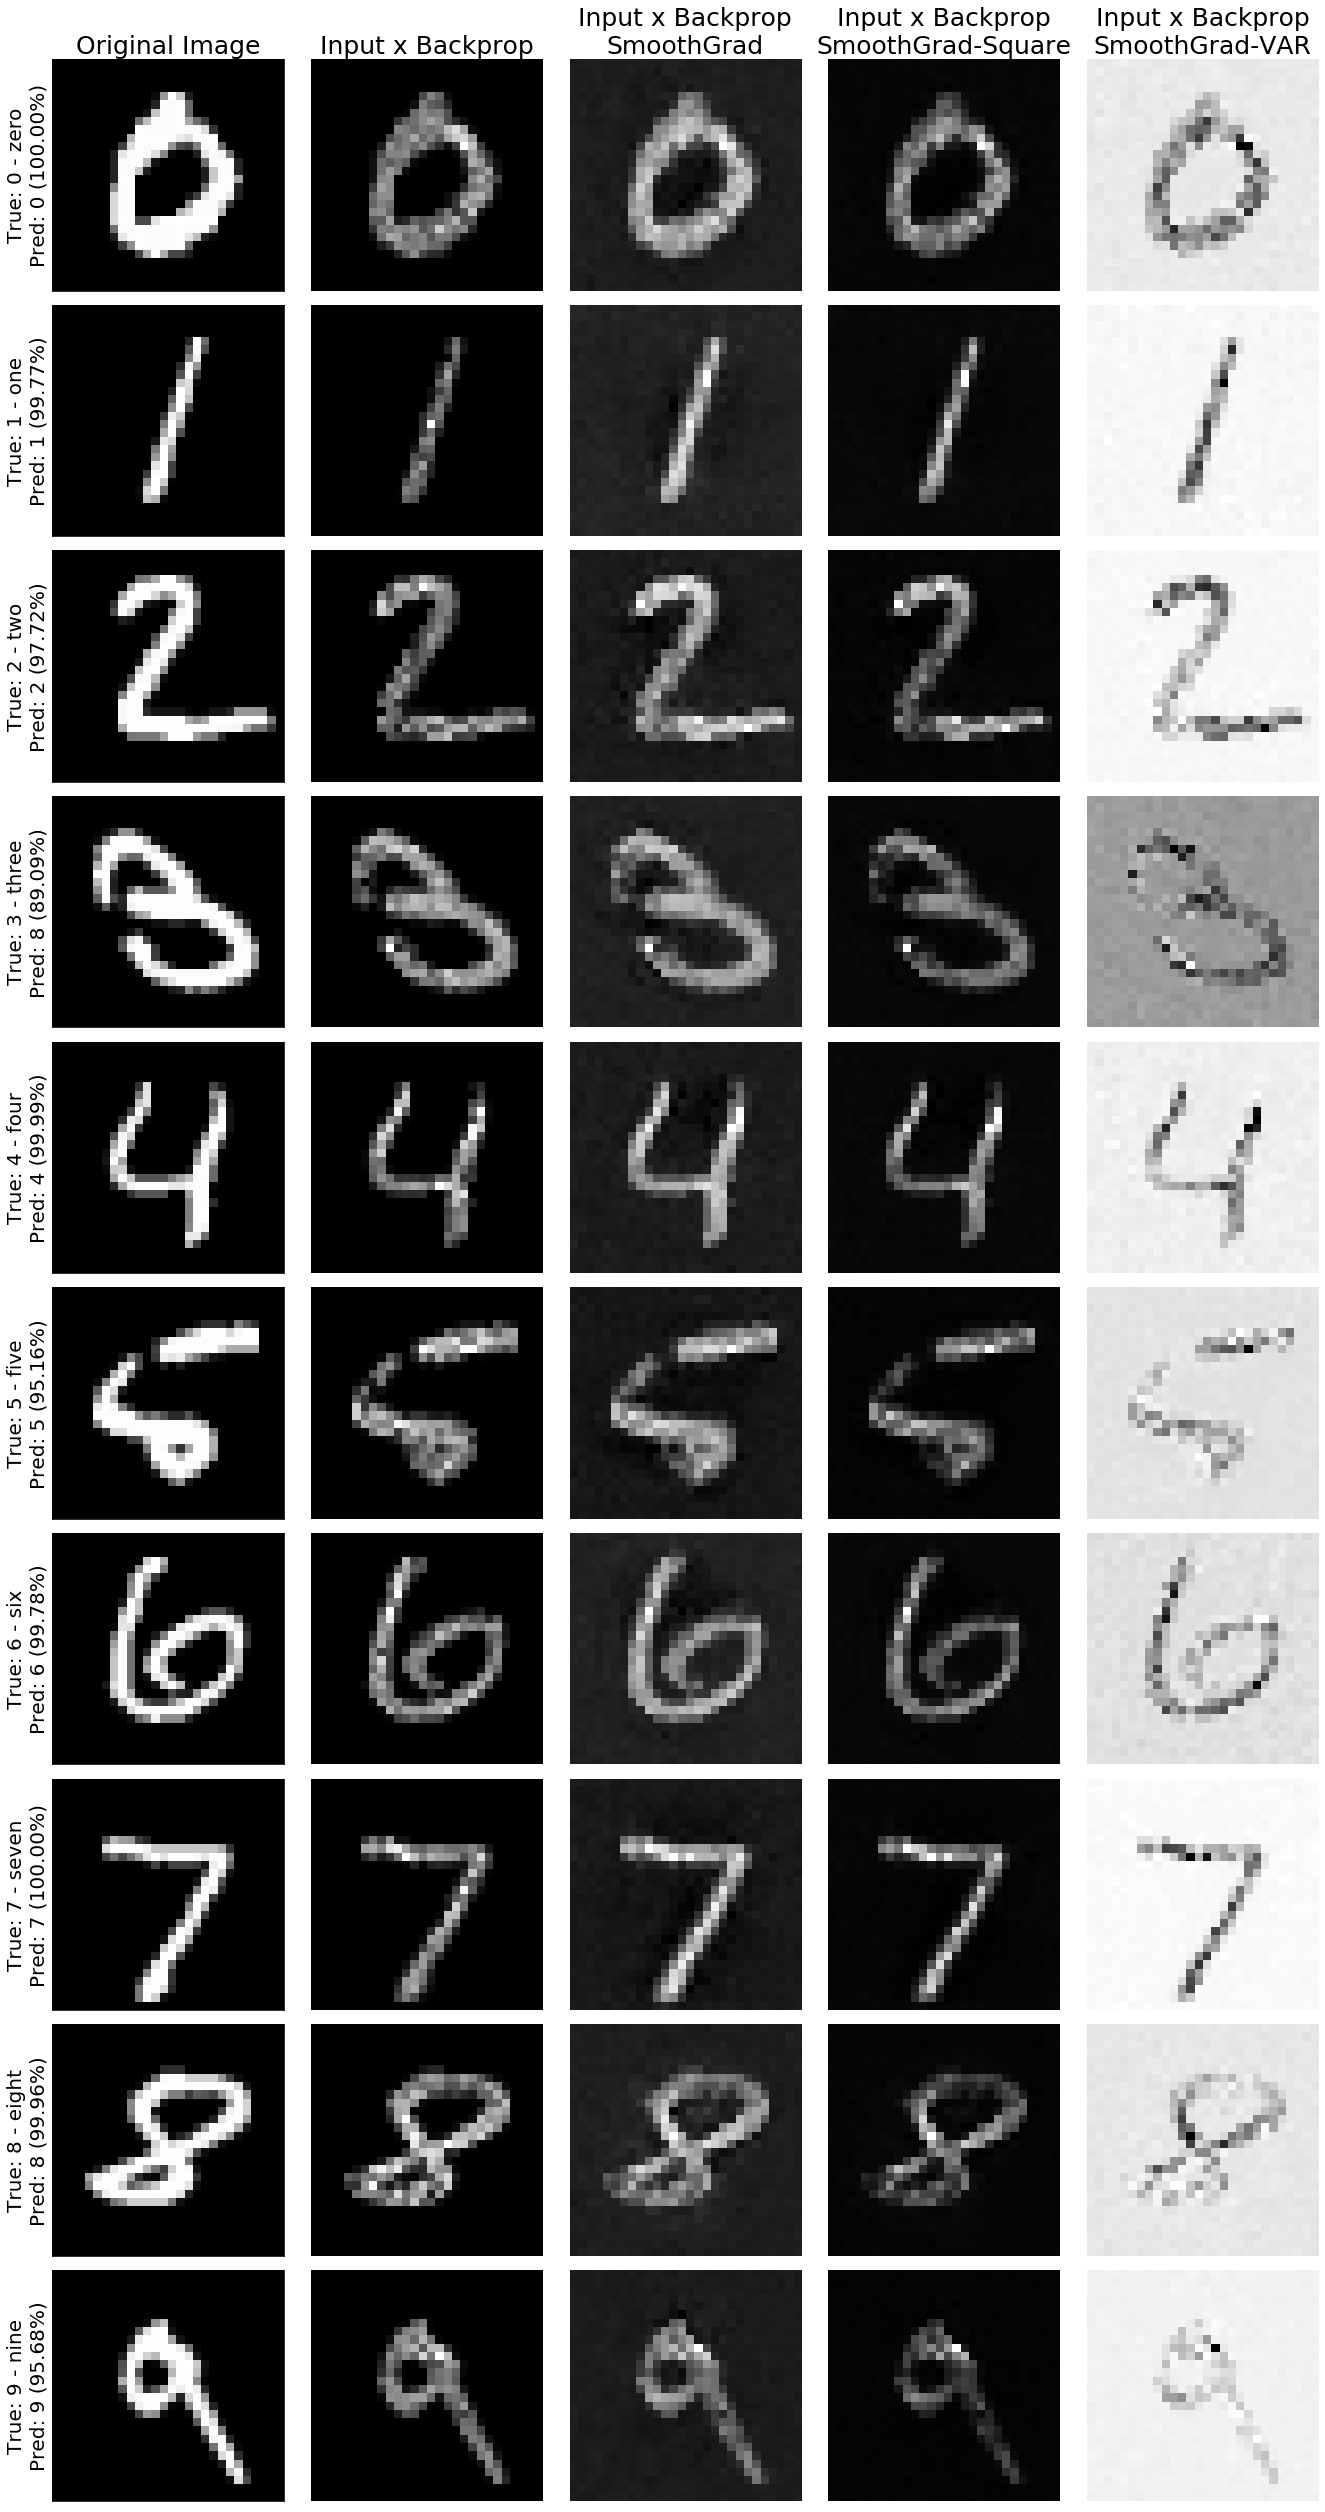

In [6]:
names = ['Input x Backprop',
         'Input x Backprop\nSmoothGrad','Input x Backprop\nSmoothGrad-Square','Input x Backprop\nSmoothGrad-VAR'] # names
results = [outputs, outputs_SG, outputs_SG_SQ, outputs_SG_VAR]
target = 'mnist'

visualize_saliencys(original_images_mnist,
                    results,
                    probs,
                    preds,
                    mnist_classes,
                    names,
                    target,
                    col=5, row=10, size=(20,35), labelsize=20, fontsize=25)

# CIFAR10

In [7]:
# Input x vanilla gradients
outputs, probs, preds = cifar10_IB.generate_image(pre_images_cifar10, original_targets_cifar10)

# ensemble
n = 50
sigma = 2
# Input x vanilla gradients + smooth grad
outputs_SG, _, _ = generate_smooth_grad(pre_images_cifar10, original_targets_cifar10, n, sigma, cifar10_IB)
# Input x vanilla gradients + smooth square grad
outputs_SG_SQ, _, _ = generate_smooth_square_grad(pre_images_cifar10, original_targets_cifar10, n, sigma, cifar10_IB)
# Input x vanilla gradients + smooth var grad
outputs_SG_VAR, _, _ = generate_smooth_var_grad(pre_images_cifar10, original_targets_cifar10, n, sigma, cifar10_IB)

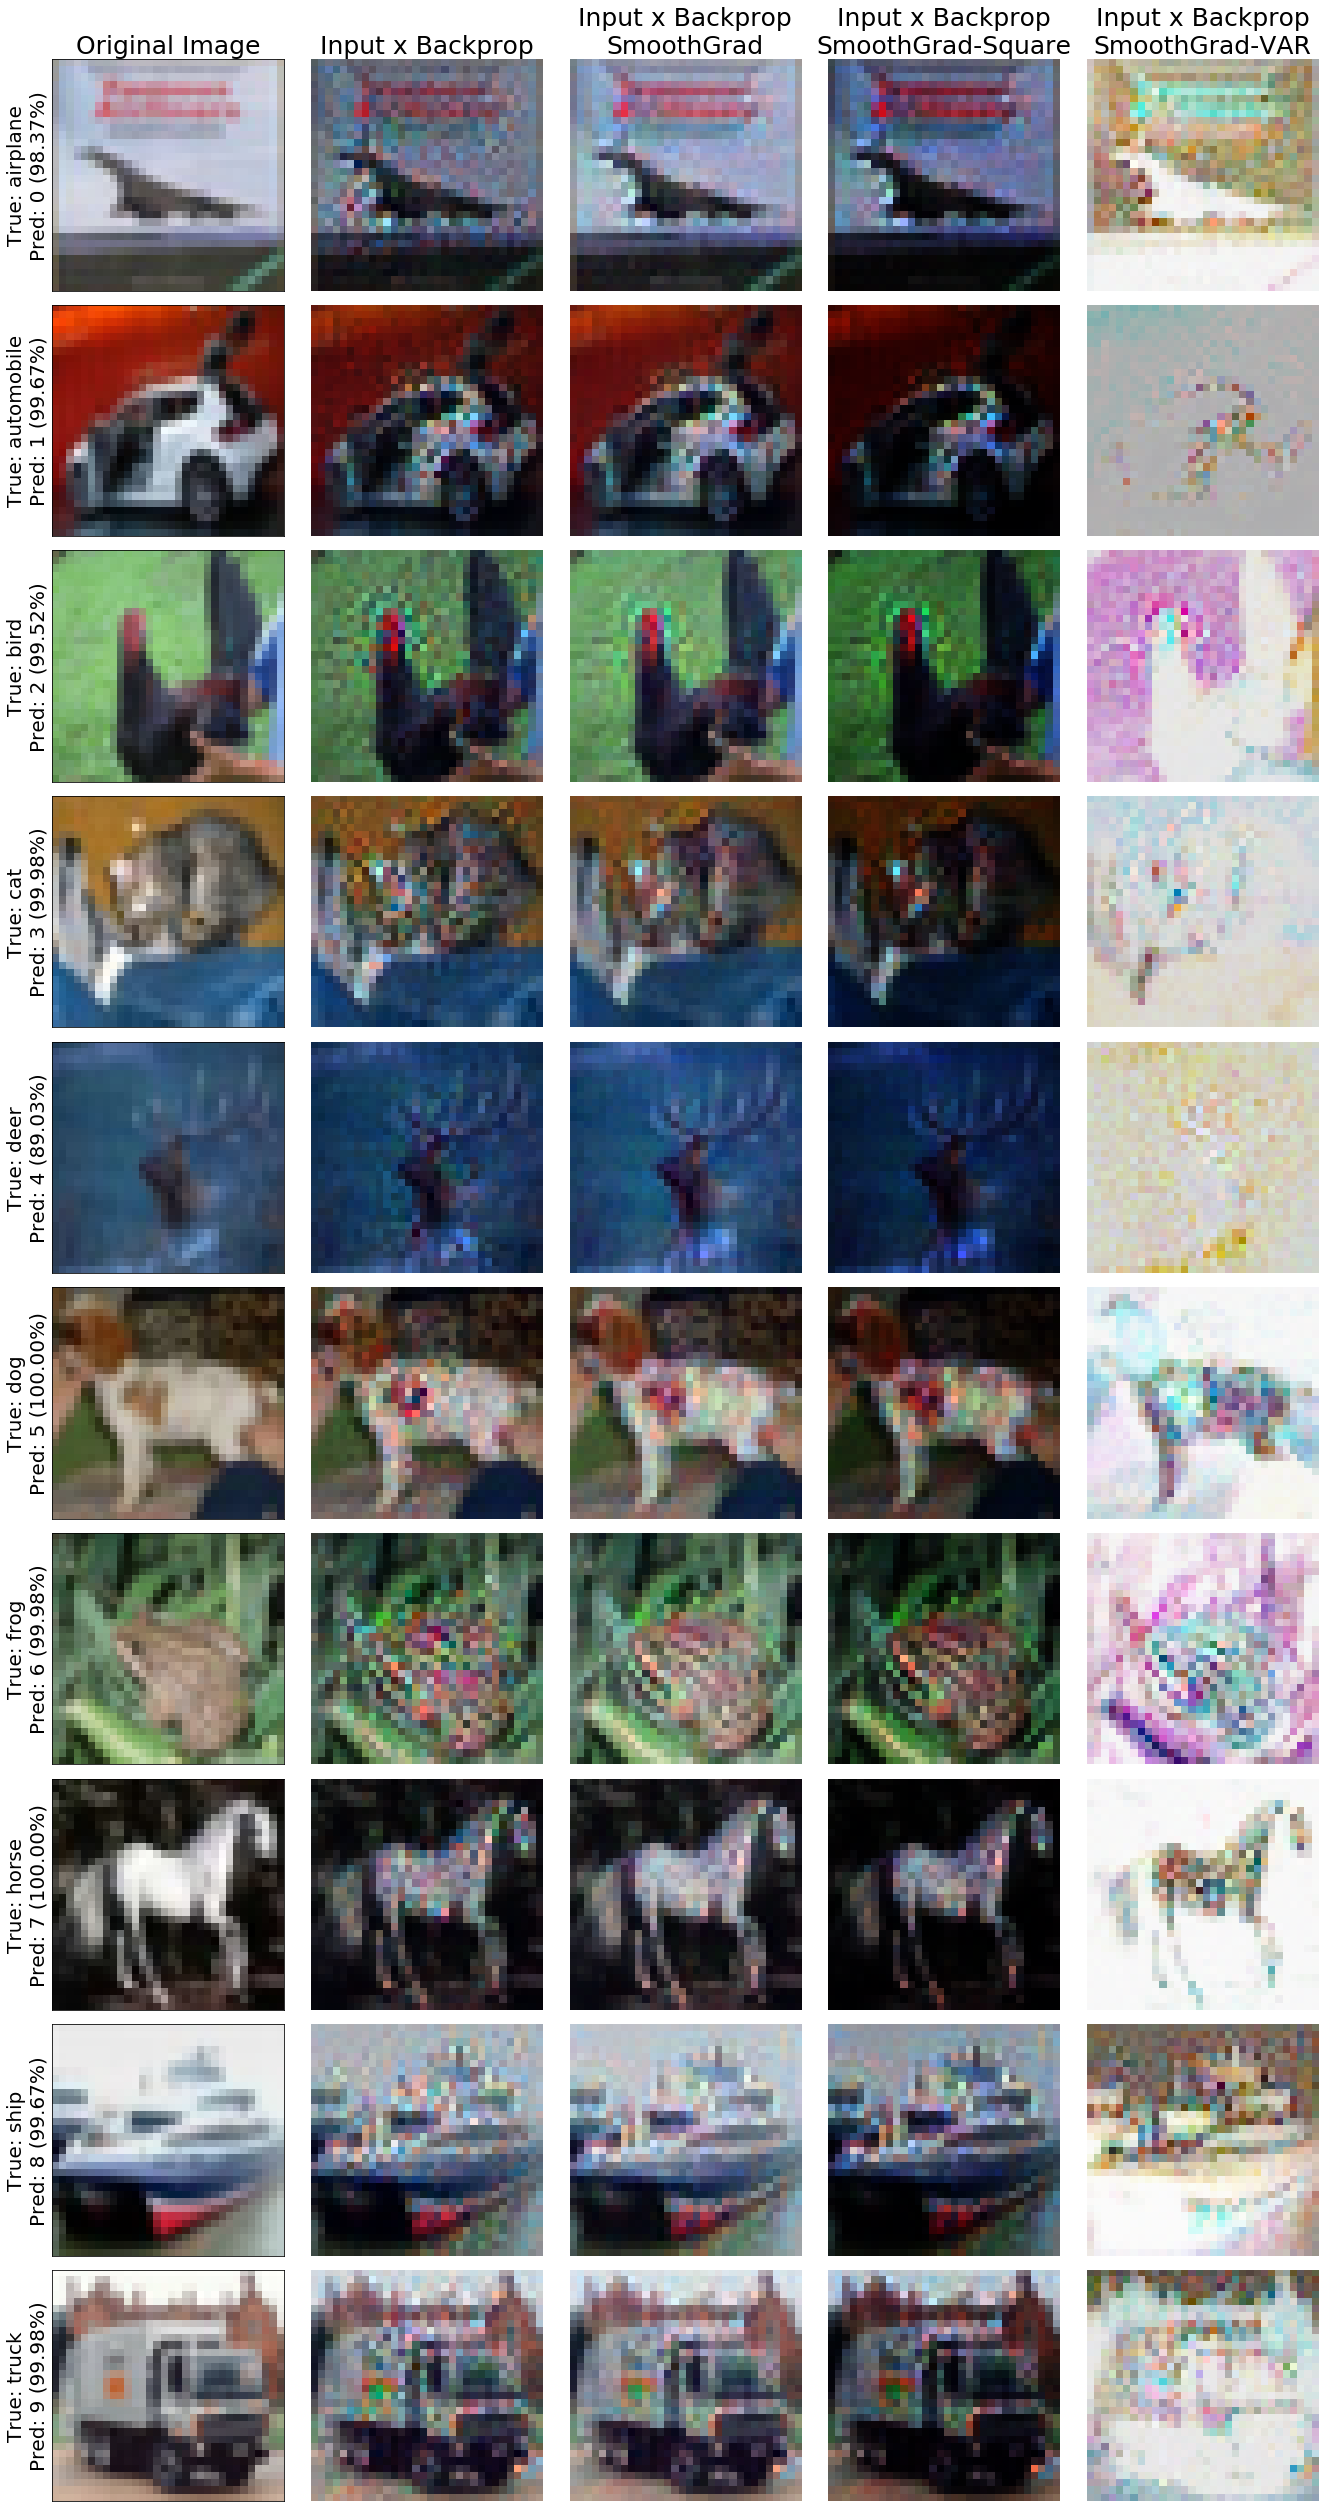

In [8]:
names = ['Input x Backprop',
         'Input x Backprop\nSmoothGrad','Input x Backprop\nSmoothGrad-Square','Input x Backprop\nSmoothGrad-VAR'] # names
results = [outputs, outputs_SG, outputs_SG_SQ, outputs_SG_VAR]
target = 'cifar10'

visualize_saliencys(original_images_cifar10,
                    results,
                    probs,
                    preds,
                    cifar10_classes,
                    names,
                    target,
                    col=5, row=10, size=(20,35), labelsize=20, fontsize=25)

# Save saliency maps

## MNIST

In [9]:
trainloader, validloader, testloader = mnist_load(shuffle=False)

Data Complete


In [10]:
mnist_IB.save_saliency_map(trainloader, '../saliency_maps/[mnist]IB_train.hdf5')
mnist_IB.save_saliency_map(validloader, '../saliency_maps/[mnist]IB_valid.hdf5')
mnist_IB.save_saliency_map(testloader, '../saliency_maps/[mnist]IB_test.hdf5')

Vanilla Backprop: 100%|██████████████████████████████████████████████████████████████| 375/375 [02:15<00:00,  2.43it/s]


Save saliency maps


Vanilla Backprop: 100%|████████████████████████████████████████████████████████████████| 94/94 [00:30<00:00,  3.23it/s]


Save saliency maps


Vanilla Backprop: 100%|████████████████████████████████████████████████████████████████| 79/79 [00:24<00:00,  3.21it/s]


Save saliency maps


## CIFAR10

In [5]:
trainloader, validloader, testloader = cifar10_load(shuffle=False, augmentation=False)

Files already downloaded and verified
Files already downloaded and verified
Data Complete


In [6]:
cifar10_IB.save_saliency_map(trainloader, '../saliency_maps/[cifar10]IB_train.hdf5')
cifar10_IB.save_saliency_map(validloader, '../saliency_maps/[cifar10]IB_valid.hdf5')
cifar10_IB.save_saliency_map(testloader, '../saliency_maps/[cifar10]IB_test.hdf5')

Vanilla Backprop: 100%|██████████████████████████████████████████████████████████████| 313/313 [03:57<00:00,  1.17it/s]


Save saliency maps
